# Analysing Hydration Free Energies from a SOMD Simulation

This notebook will guide you through how to run an alchemical free energy analysis. We are looking at how to compute the relative hydration free energy between ethane and methanol using the Sire tool `analyse_freenrg mbar`.


The notebook forms part of the CCPBio-Sim workshop **Alchemical Free Energy Simulation Analysis with analyse_freenrg** run on the 11th of April 2018 at the University of Bristol.

*Author: Antonia Mey   
Email: antonia.mey@ed.ac.uk*

**Reading time of the document: 30 mins**


## Let's start with the necessary imports

In [1]:
%pylab inline
import glob
import seaborn as sbn
sbn.set_style("ticks")
sbn.set_context("notebook", font_scale = 2)

Populating the interactive namespace from numpy and matplotlib


## Quick reminder of what we are looking at

This notebook is designed to run an alchemical free energy analysis. We are looking at how to compute the relative hydration free energy between ethane and methanol. The idea stems from using the fact that you can write down a thermodynamic cycle for the hydration process such as this:

![cycle](../images/Therm_cycle.png)

The analysis will be done using the `analyse_freenrg mbar` tool in Sire, assuming that the required alchemical free energy calculations were run with somd-freenrg. It will be assumed that you have successfully run a simulation and data to be analysed can be found in the directory `data`.

## Understanding the data

When we run a SOMD free energy calculation a lot of data is generated. Generally a good directory structure for keeping track of your data and allowing automation in the analysis is required. An example of how to structure your data is shown in the picture below and can be found in your current working directory of this notebook:
![directory](../images/Directory_structure.png)

The directories ranging from `lambda-0.000` to `lambda-1.0000` contain the main ouptut data. You would normall find the following set of files:   

``` gradients.dat  moves.dat    sim_restart.s3           SYSTEM.s3
gradients.s3   simfile.dat  sim_restart.s3.previous  traj000000001.dcd```

`.s3` files are sire related files. The file `traj000000001.dcd` contains the simulation trajectory.

**1. Task -- Can you visualise the trajectory of the λ=0.0 simulation of the vaccuum simulation using nglview and the topology file provided?**

In [6]:
pwd

'/home/workshops/fe_analysis/01_Analysis_ethane_methanol/answers'

In [8]:
#trajectory file
traj_file = '../data/ethane~methanol/vacuum/run001/output/lambda-0.00/traj000000001.dcd'
#topology file
topology_file = '../data/ethane~methanol/vacuum/run001/output/lambda-0.00/SYSTEM.parm7'
##Insert code here to load your trajectory into nglview
import mdtraj as md
from nglview import NGLWidget
protein = md.load(traj_file, top=topology_file)
view = NGLWidget()
view.add_trajectory(protein)
view

NGLWidget(count=4000)

The most important file needed for the data analysis however, is the `simfile.dat`. You can find in every λ directory. Let's have a look at what the file contains. We can easily access it using the `head` command:

In [10]:
!head -n13 ../data/ethane~methanol/free/run001/output/lambda-0.000/simfile.dat

#This file was generated on Thu Apr  5 15:36:13 2018
#Using the somd command, of the molecular library Sire version <2018.1.0> 
#For more information visit: https://github.com/michellab/Sire
#
#General information on simulation parameters:
#Simulation used 10000 moves, 100 cycles and 2000 ps of simulation time 
#Generating lambda is		 0.00000
#Alchemical array is		 (0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0)
#Generating temperature is 	25 C
#Energy was saved every 250 steps 
#
#
#   [step]      [potential kcal/mol]       [gradient kcal/mol]      [forward Metropolis]     [backward Metropolis]                   [u_kl]


The file contains information on:
- when it was generated, 
- what version of Sire/SOMD was used and 
- what essential simulation parameters were used. 

In particular you find information on 
- how long the simulation was run, 
- what the saving intervals was 
- what λ value was used, 
- what the other alchemical values were, 
- and the temperature of the simualtion. 

These are all recorded in the comments, as indicated by the #. The data in the file is then contained in the following columns, where headings are indicated. The step, the current potential energy in kcal/mol, the gradient, used for thermodynamic integration, in kcal/mol forward and backward Metropolis, which are not relevant for this tutorial, and reduced potential energies (unitless) of the energies evaluated at each alchemical state. Don't worry if this is a bit confusing, you don't really have to do anything with it, but it is necessary input for MBAR. 

## Actual data analysis using pymbar and thermodynamic integration

In the following we will look at how we can actually extract the free energy differences using `analyse_freenrg mbar` to compute the relative hydration free energy of ethane and methanol. We will look at both ways to compute this free energy difference using the available command line interface but also how to easily compute 

### Using the commandline interface `analyse_freenrg mbar`
You can open a terminal and compute a free energy from the simulations of the solvated molecule in water going through a pertubration and the free energy from the vaccuum simulation. You can either use the terminal along with the notebook or look at the cells below to execute a bash command. In order to get overview of all the functionality of the tool you can simply type `analyse_freenrg mbar --help`.

#### Soulte in Water
For this you can either use the terminal to type: ` analyse_freenrg mbar -i data/ethane~methanol/free/run001/output/lambda-*/simfile.dat -o free.dat --subsampling` or invoke the next cell. This uses pymbar and computes a single ΔG for the perturbation of ethane to methanol while solvated in water. The output file `free.dat` contains all useful data for further analysis and we will look at it in a bit. 

In [22]:
!analyse_freenrg mbar -i ../data/ethane~methanol/free/run001/output/lambda-*/simfile.dat -o free.dat --subsampling

Starting analyse_freenrg: number of threads equals 8

Simulation data is analysed using the python module pymbar
----------------------------------------------------------
# Writing all output to file free.dat
#Lambda array was not given, trying to infer lambda values from simulation files...
working on input file ../data/ethane~methanol/free/run001/output/lambda-0.000/simfile.dat
working on input file ../data/ethane~methanol/free/run001/output/lambda-0.100/simfile.dat
working on input file ../data/ethane~methanol/free/run001/output/lambda-0.200/simfile.dat
working on input file ../data/ethane~methanol/free/run001/output/lambda-0.300/simfile.dat
working on input file ../data/ethane~methanol/free/run001/output/lambda-0.400/simfile.dat
working on input file ../data/ethane~methanol/free/run001/output/lambda-0.500/simfile.dat
working on input file ../data/ethane~methanol/free/run001/output/lambda-0.600/simfile.dat
working on input file ../data/ethane~methanol/free/run001/output/lambda-0.70

#### Solute in Vacuum
Now we have to do the same analysis for the vacuum siumulations. Again type on the command line:
`analyse_freenrg mbar -i data/ethane~methanol/vacuum/run001/output/lambda-*/simfile.dat -o vacuum.dat --subsampling`.
Note how we have now replaced the `free` directroy with `vacuum` and use a different ouptutfile `vacuum.dat`. Below again is a simple way of executing it in this notebook

In [23]:
!analyse_freenrg mbar -i ../data/ethane~methanol/vacuum/run001/output/lambda-*/simfile.dat -o vacuum.dat --subsampling

Starting analyse_freenrg: number of threads equals 8

Simulation data is analysed using the python module pymbar
----------------------------------------------------------
# Writing all output to file vacuum.dat
#Lambda array was not given, trying to infer lambda values from simulation files...
working on input file ../data/ethane~methanol/vacuum/run001/output/lambda-0.00/simfile.dat
working on input file ../data/ethane~methanol/vacuum/run001/output/lambda-0.10/simfile.dat
working on input file ../data/ethane~methanol/vacuum/run001/output/lambda-0.20/simfile.dat
working on input file ../data/ethane~methanol/vacuum/run001/output/lambda-0.30/simfile.dat
working on input file ../data/ethane~methanol/vacuum/run001/output/lambda-0.40/simfile.dat
working on input file ../data/ethane~methanol/vacuum/run001/output/lambda-0.50/simfile.dat
working on input file ../data/ethane~methanol/vacuum/run001/output/lambda-0.60/simfile.dat
working on input file ../data/ethane~methanol/vacuum/run001/output/

### Looking at the mbar output
We have now generated the files `free.dat` and `vacuum.dat`. At the bottom of the file we have information on the computed free energy difference of the simulation in solution and vacuum. 

In [25]:
!tail free.dat

0.5000 -0.6195
0.6000 -0.9046
0.7000 -1.3670
0.8000 -2.0193
0.9000 -2.8812
1.0000 -3.8240
#MBAR free energy difference in kcal/mol: 
-3.849472, 0.039748 
#TI free energy difference in kcal/mol: 
-3.824046  


In [26]:
!tail vacuum.dat

0.5000 1.1749
0.6000 1.4457
0.7000 1.7090
0.8000 1.9682
0.9000 2.2234
1.0000 2.4770
#MBAR free energy difference in kcal/mol: 
2.492748, 0.009131 
#TI free energy difference in kcal/mol: 
2.477022  


Note how the free energy was computed for both thermodynamic integration and MBAR. One way of assuring that free energy estimates are not terrible is to compare these two different estiamtors to each other. They work very differently in which way they lead to the computation of the free energy and a close agreement is usually a good indication for having well converged simulations. 

Now we want to actually calculated ΔΔG of the relative hydration free energy for ethane and methanol. It is given by this formula:   
![free_en](../images/DDG.png)

Let's extract the relevant information from the files we computed and find out the hydration free energy.

In [27]:
#helper function to extract DG from the freenrg_analysis generated files. 
def get_nth_line(fname, line):
    fh = open (fname, 'r')
    lineList = fh.readlines()
    fh.close()
    return lineList[line].split(',')

In [28]:
vac_mbar = get_nth_line('vacuum.dat', -3)
vac_ti = get_nth_line('vacuum.dat', -1)

solv_mbar = get_nth_line('free.dat', -3)
solv_ti = get_nth_line('free.dat', -1)

#mbar
DG_vac_mbar = float(vac_mbar[0])
DG_solv_mbar = float(solv_mbar[0])

#ti
DG_vac_ti = float(vac_ti[0])
DG_solv_ti = float(solv_ti[0])

**2. Task: Compute ΔΔG according to the above formula using the data in the variable `DG_vac_mbar`, `DG_solv_mbar` for the free energy estimate using MBAR**

In [29]:
#insert code here
DDG_mbar = DG_solv_mbar- DG_vac_mbar

**3. Task: Compute ΔΔG according to the above formula using the data in the variable `DG_vac_ti`, `DG_solv_ti` for the free energy estimate using MBAR**

In [30]:
#insert code here
DDG_ti =DG_solv_ti-DG_vac_ti

**The experimental absolute free energy of hydration of ethane is +1.8 kcal/mol. The experimental absolute free energy of hydration of methanol is -5.1 kcal/mol How well do the exeperimental results compare to the computed result?**

## Errors and looking at more data
We are running a simulation with limited data with the assumption that a time average over the data is a good represeantion of the average observable, i.e. the free energy in this case. Doing an error analysis is important.   
MBAR does have an inbuilt error erstimate and we can compute the error to go along the computed `DDG_mbar` variable by doing some error propagation :
![error](../images/error_propagation.png)

**4. Task: Compute the error on ΔΔG using the rules of error propagation.**

In [31]:
#retrieving the error
DG_vac_mbar_error = float(vac_mbar[1])
DG_solv_mbar_error = float(solv_mbar[1])
#Now insert the code needed to estiamte the error:
DDG_error = np.sqrt(DG_vac_mbar_error*DG_vac_mbar_error+DG_solv_mbar_error*DG_solv_mbar_error)

print ('The relative hydration free energy of ethane and methanol' 
       'is %.2f ± %.2f kcal/mol' %(DDG_mbar,DDG_error))

The relative hydration free energy of ethane and methanolis -6.34 ± 0.04 kcal/mol


In order to obtain reliable error estimats it is strongly recommended to have multiple independent runs of your simulations. These independent runs can then be used get more accurate error estimates. 

### Comparing PMF of MBAR and TI
The free energy files produced by `analyse_freenrg mbar` contain additional information, such as the potential of mean force over the different λ windows. Again we can compare MBAR estimates easily with TI estimates this way. Furthermore we can also look at the average gradient used for TI. In the following we will explore how to plot these. 

In [32]:
#Let's read the free.dat file
fh = open ('free.dat', 'r')
lines = fh.readlines()
fh.close()
#Now we need to find the PMF in the file
#Let's loop over the lines and extract the data
count = 0
num_lambdas = 11
pmf_mbar = []
pmf_ti = []
for line in lines:
    if line.startswith('#PMF from MBAR'):
        pmf_mbar = lines[(count+1):(count+1+num_lambdas)]
    if line.startswith('#PMF from TI'):
        pmf_ti = lines[(count+1):(count+1+num_lambdas)]
    count = count +1
for i in range(len(pmf_mbar)):
    temp = pmf_mbar[i].strip().split(' ')
    float_temp = [float(i) for i in temp]
    pmf_mbar[i] = float_temp
pmf_mbar =np.array(pmf_mbar)

for i in range(len(pmf_ti)):
    temp = pmf_ti[i].strip().split(' ')
    float_temp = [float(i) for i in temp]
    pmf_ti[i] = float_temp
pmf_ti =np.array(pmf_ti)

Now we have two numpy array `pmf_ti` and `pmf_mbar`, wich we can use to plot the pmfs. The first column of the array is the lambda value. The second column of the array is free pmf and the third value for the mbar estimate is the error on the pmf. We can now plot these. Make sure you understand how to read and write a plot like this. 

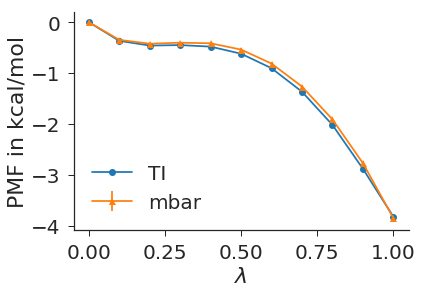

In [33]:
plot(pmf_ti[:,0], pmf_ti[:,1], marker = 'o', label='TI')
errorbar(pmf_mbar[:,0], pmf_mbar[:,1], yerr=pmf_mbar[:,2], marker = '^', label='mbar')
xlabel(r'$\lambda$')
ylabel('PMF in kcal/mol')
legend()
sbn.despine()

### Plotting the average gradient
Below we will create a similar plot as before using the average gradient. 

In [34]:
## extracting gradient data
count = 0
num_lambdas = 11
avg_gradient = []
for line in lines:
    if line.startswith('#TI average gradients'):
        avg_gradient = lines[(count+1):(count+1+num_lambdas)]
        break
    count = count +1
for i in range(len(avg_gradient)):
    temp = avg_gradient[i].strip().split(' ')
    float_temp = [float(i) for i in temp]
    avg_gradient[i] = float_temp
avg_gradient =np.array(avg_gradient)

**5. Task: Plot `avg_gradient` using errorbar from the example above.**

Text(0,0.5,'$\\langle\\frac{\\partial U}{\\partial \\lambda}\\rangle$ [kcal/mol]')

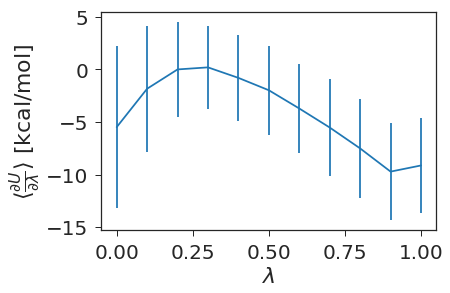

In [40]:
#Insert code here to plot the average gradient
errorbar(avg_gradient[:,0], avg_gradient[:,1], avg_gradient[:,2])
xlabel(r'$\lambda$')
ylabel(r'$\langle\frac{\partial U}{\partial \lambda}\rangle$ [kcal/mol]')

## Best practices:
So how do we know if the simulation is actually reliable or not. There are some rules of thumb that can be used to assess this, i.e. follow some best practices. 

We follow general guidelines presented by [Kilmovich, Shirts and Mobley](https://dx.doi.org/10.1007%2Fs10822-015-9840-9)

The paper suggests the following:
"Conceptually, we break analysis into four main stages:
 - subsampling the data to retain uncorrelated samples
 - calculating free energy differences along with the corresponding statistical errors via a variety of TI-and FEP-based methods
- producing textual and graphical outputs of the computed data inspecting for:
   1. for convergence and identifying the equilibrated portion of the simulation
   2. good phase space overlap for all pairs of adjacent lambda states"
   
You will find that we have already addressed most of these best practice ideas. Indeed we used the `--subsampling` flag inorder to obtain uncorrelated samples from the data when running our analysis and we are comparing the free energy estimate using an integral based method (TI) and a reweighting method (MBAR). What we haven't done yet is look at phase space overlap and detecting equilibration. This will be handeled to some extent in the advanced tasks. In the following we will look at good phase space overlap of adjacent lambda states. 

### The overlap matrix
can be used to look at the phase space overlap of neighbouring lambdas. By adding the flag `--overlap` this matrix will be automatically computed and added to the output file. So let's look at the overlap matrix for the simulation in solution and vacuum. This time we will write out a files called `free_overlap.dat` and `vacuum_overlap.dat`

In [55]:
%%capture run_info_vacuum
#Let's run the analysis again with the keyword --overlap
!analyse_freenrg mbar -i ../data/ethane~methanol/vacuum/run001/output/lambda-*/simfile.dat -o vacuum_overlap.dat --subsampling --overlap

In [56]:
%%capture run_info_solution
!analyse_freenrg mbar -i ../data/ethane~methanol/free/run001/output/lambda-*/simfile.dat -o free_overlap.dat --subsampling --overlap

In [57]:
#A helper function to read the overlap matrix from file
def get_overlp_matrix(filename, n_states=11):
    fh = open (filename, 'r')
    lines = fh.readlines()
    fh.close()
    count = 0
    matrix = []
    for line in lines:
        if line.startswith('#Overlap'):
            matrix = lines[(count+1):(count+1+n_states)]
            break
        count = count+1 
    for i in range(len(matrix)):
        temp = matrix[i].strip().split(' ')
        float_temp = [float(j) for j in temp]
        matrix[i] = float_temp
    matrix =np.array(matrix)
    return matrix

In [59]:
overlap_vacuum = get_overlp_matrix('vacuum_overlap.dat')
overlap_solv = get_overlp_matrix('free_overlap.dat')

### Plotting the overlap matrices
The plotting library has a nice advanced heat map feature that allows you to not only plot a pictorial image of a matrix or heatmap but also add the numercal values making it easier to read the plot

Text(0.5,1,'Overlap matrix in vacuum')

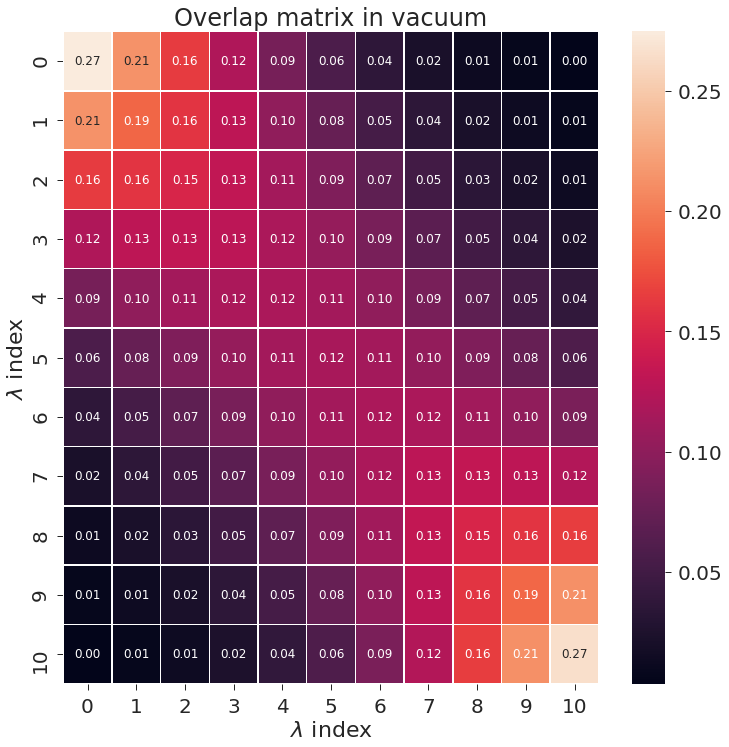

In [60]:
fig = figure(figsize=(12,12))
ax = sbn.heatmap(overlap_vacuum, annot=True, fmt='.2f', linewidths=.5, annot_kws={"size": 12})
ax.set_xlabel(r'$\lambda$ index')
ax.set_ylabel(r'$\lambda$ index')
ax.set_title('Overlap matrix in vacuum')

Text(0.5,1,'Overlap matrix in solution')

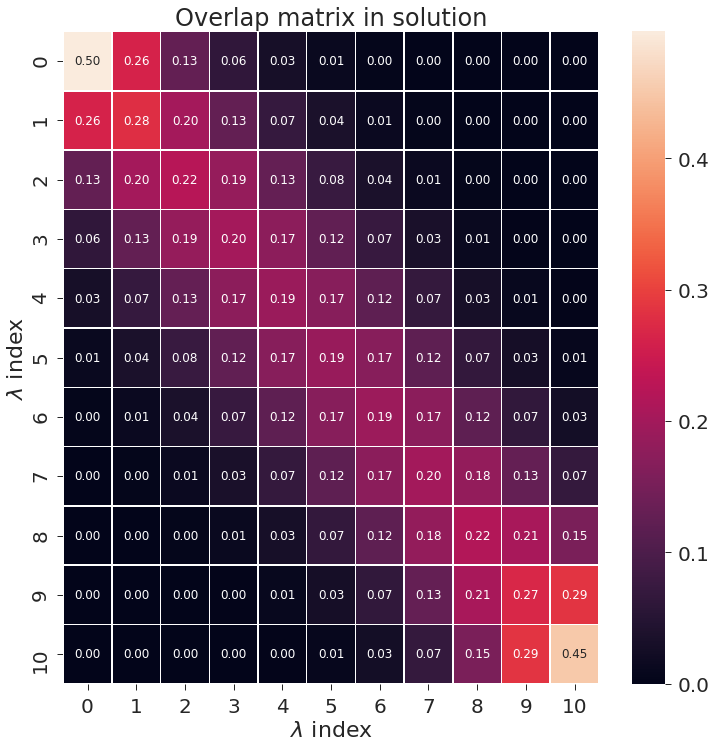

In [61]:
fig = figure(figsize=(12,12))
ax = sbn.heatmap(overlap_solv, annot=True, fmt='.2f', linewidths=.5, annot_kws={"size": 12})
ax.set_xlabel(r'$\lambda$ index')
ax.set_ylabel(r'$\lambda$ index')
ax.set_title('Overlap matrix in solution')

### Example of a bad overlap matrix
Below we have the same simulation as before, but reducing the number of lambda windows from 11 to 6. What do you observe in terms of the overlap matrix?

Text(0.5,1,'Overlap matrix with 6 lambda')

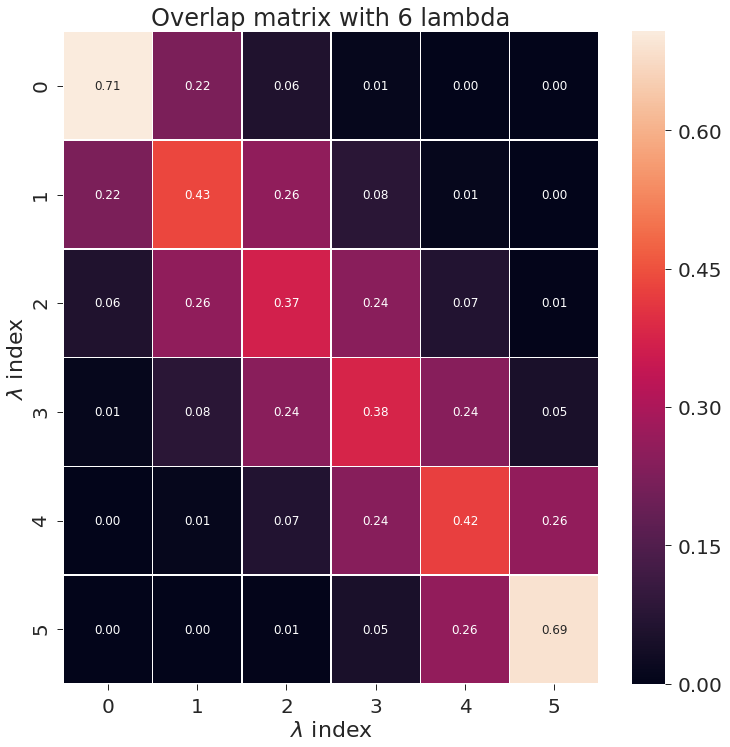

In [63]:
## insert code in order to plot the  overlap matrix for the reduced number of lambda windows.
overlap_bad = get_overlp_matrix('../data/ethane~methanol/6-lambda-overlap.dat', n_states=6)
fig = figure(figsize=(12,12))
ax = sbn.heatmap(overlap_bad, annot=True, fmt='.2f', linewidths=.5, annot_kws={"size": 12})
ax.set_xlabel(r'$\lambda$ index')
ax.set_ylabel(r'$\lambda$ index')
ax.set_title('Overlap matrix with 6 lambda')

### Advanced tasks
Compare your estimate using less data. `analyse_freenrg mbar` has the option `--discard`. This will run your analysis with a number of frames discarded from the start of the simulation. 

Advanced tasks:
1. Rerun the analysis discarding 1000 frames from the start writing out a new free.dat and vacuum.dat file. 
2. Compute the relative free energy of hydration from the new analysis. How does the value differe from your original estimate? Does is compare better or worse to the experimental value?
3. Plot the PMF of the original analysis and the one with the initial 1000 frames discarded for the simulations in solution. What do you observe?
4. Explore the various plots and overlaps for the vacuum simulation as well. 

In [ ]:
#Rerun with discarding 1000 frames form the vacuum simulation here:



In [ ]:
#Rerun with discarding 1000 frames form the solution simulation here:



In [ ]:
#Compute the hydration free energy from this new estimate:



In [ ]:
#Plot the PMF of the MBAR analysis of the original analysis in comparison to the 
#MBAR analysis where the first 1000 frames were discarded. 




### A little quiz for the end
Congratulations you have finished this tutorial! Time for a little feedback https://goo.gl/forms/PRQWV8qrL9vdTc8P2 followed by a coffee or tea break :-)